# **Boosting Techniques**
___

**Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.**

- **Definition of Boosting:**
  - Boosting is an ensemble learning technique that combines multiple weak learners to create a strong learner.
  - It works by sequentially training models, where each new model focuses on the errors made by the previous ones.

- **Improvement of Weak Learners:**
  - Each weak learner is trained on the data, and the predictions are combined to produce a final output.
  - Boosting reduces bias and variance, leading to improved accuracy.
  - It assigns higher weights to misclassified instances, allowing subsequent models to learn from previous mistakes.

___

**Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**

- **AdaBoost:**
  - Focuses on adjusting the weights of misclassified instances after each iteration.
  - Combines weak learners by assigning weights based on their accuracy.
  - Each model is trained independently, and the final prediction is a weighted sum of all models.

- **Gradient Boosting:**
  - Trains models sequentially, where each new model is trained to predict the residuals (errors) of the previous model.
  - It optimizes a loss function using gradient descent.
  - Models are dependent on each other, and the final prediction is the sum of all models' predictions.

___

**Question 3: How does regularization help in XGBoost?**

- **Purpose of Regularization:**
  - Regularization helps prevent overfitting by adding a penalty for complexity in the model.
  
- **Types of Regularization in XGBoost:**
  - L1 Regularization (Lasso): Encourages sparsity in the model by penalizing the absolute value of coefficients.
  - L2 Regularization (Ridge): Penalizes the square of the coefficients, helping to smooth the model.

- **Benefits:**
  - Improves generalization to unseen data.
  - Controls the complexity of the model, leading to better performance.

___

**Question 4: Why is CatBoost considered efficient for handling categorical data?**

- **Handling Categorical Features:**
  - CatBoost automatically processes categorical features without the need for extensive preprocessing (like one-hot encoding).
  
- **Ordered Target Statistics:**
  - It uses a technique called ordered target statistics to avoid overfitting on categorical features.
  
- **Efficiency:**
  - Reduces the need for manual feature engineering.
  - Maintains the natural order of categories, leading to better model performance.

___

**Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?**

- **Applications:**
  - **Finance:** Credit scoring and risk assessment.
  - **Healthcare:** Disease prediction and diagnosis.
  - **Marketing:** Customer segmentation and churn prediction.
  - **Image Recognition:** Object detection and classification tasks.
  
- **Reasons for Preference:**
  - Boosting often yields higher accuracy due to its focus on correcting errors.
  - It is particularly effective in scenarios with imbalanced datasets.

In [1]:
#Question 6: Write a Python program to train an AdaBoost Classifier on the Breast Cancer dataset and print the model accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train AdaBoost Classifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.9649122807017544


In [2]:
#Question 7: Write a Python program to train a Gradient Boosting Regressor on the California Housing dataset and evaluate performance using R-squared score.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Gradient Boosting Regressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate performance
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

R-squared Score: 0.7756923945143868


In [3]:
#Question 8: Write a Python program to train an XGBoost Classifier on the Breast Cancer dataset, tune the learning rate using GridSearchCV, and print the best parameters and accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Set up parameter grid for GridSearchCV
param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3]}
# Initialize XGBoost Classifier
model = XGBClassifier()
# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
# Best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f'Best Parameters: {best_params}')
print(f'Best Accuracy: {best_accuracy}')

Best Parameters: {'learning_rate': 0.2}
Best Accuracy: 0.9670329670329672


In [5]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.6 MB/s eta 0:00:00


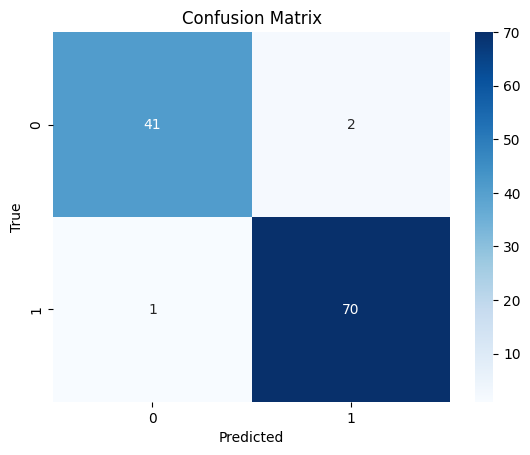

In [7]:
#Question 9: Write a Python program to train a CatBoost Classifier and plot the confusion matrix using seaborn.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train CatBoost Classifier
model = CatBoostClassifier(silent=True)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Question 10: Describe your step-by-step data science pipeline using boosting techniques for predicting loan default.**

- **Data Preprocessing:**
  - Handle missing values using imputation techniques (mean, median, or mode).
  - Convert categorical variables into numerical format using encoding techniques (e.g., one-hot encoding or label encoding).

- **Choice of Boosting Technique:**
  - Choose CatBoost for its efficiency in handling categorical data and its robustness against overfitting.

- **Hyperparameter Tuning Strategy:**
  - Use GridSearchCV or RandomizedSearchCV to find the best hyperparameters (e.g., learning rate, depth of trees, etc.).

- **Evaluation Metrics:**
  - Use metrics such as F1-score, precision, recall, and ROC-AUC to evaluate model performance, especially in imbalanced datasets.

- **Business Benefits:**
  - The model can help in identifying high-risk customers, allowing the company to make informed lending decisions and reduce default rates.